In [18]:
import pandas as pd
import numpy as np

In [19]:
df = pd.read_csv("spam.csv", encoding='latin-1')

In [20]:
df.shape

(5572, 5)

In [21]:
df.head(2)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN


In [22]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [23]:
df = pd.read_csv("spam.csv", encoding='latin-1')
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
df.rename(columns={"v1":"target",
                    "v2":'text'},inplace=True)

In [26]:
le = LabelEncoder()
df['target']=le.fit_transform(df['target'])

In [27]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [29]:
df.duplicated().sum()

np.int64(403)

In [30]:
df= df.drop_duplicates()

In [31]:
df.shape

(5169, 2)

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

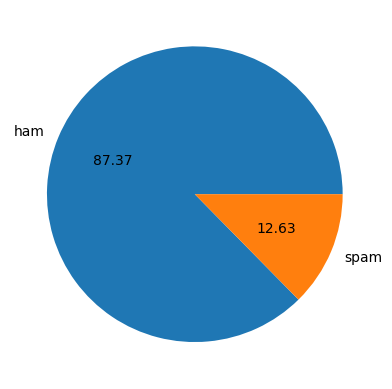

In [33]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

C:\Users\Prince Dwivedi\AppData\Local\Temp\ipykernel_6580\3651412307.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df['target'].value_counts(),palette='pastel')


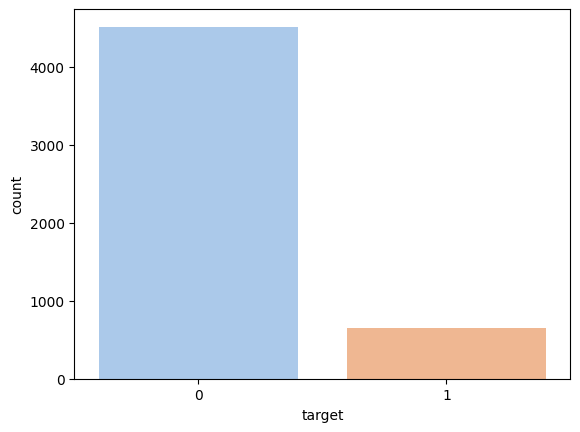

In [34]:
sns.barplot(df['target'].value_counts(),palette='pastel')
plt.show()

In [36]:
import nltk

In [37]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to C:\Users\Prince
[nltk_data]     Dwivedi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package punkt_tab to C:\Users\Prince
[nltk_data]     Dwivedi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [38]:
df['num_charcters'] = df['text'].apply(len)

In [39]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [40]:
df['num_sentence'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [41]:
df.head(2)

,target,text,num_charcters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2


In [42]:
#ham

df[df['target']==0][['num_charcters','num_words','num_sentence']].describe()

,num_charcters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [43]:
#spam
df[df['target']==1][['num_charcters','num_words','num_sentence']].describe()

,num_charcters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


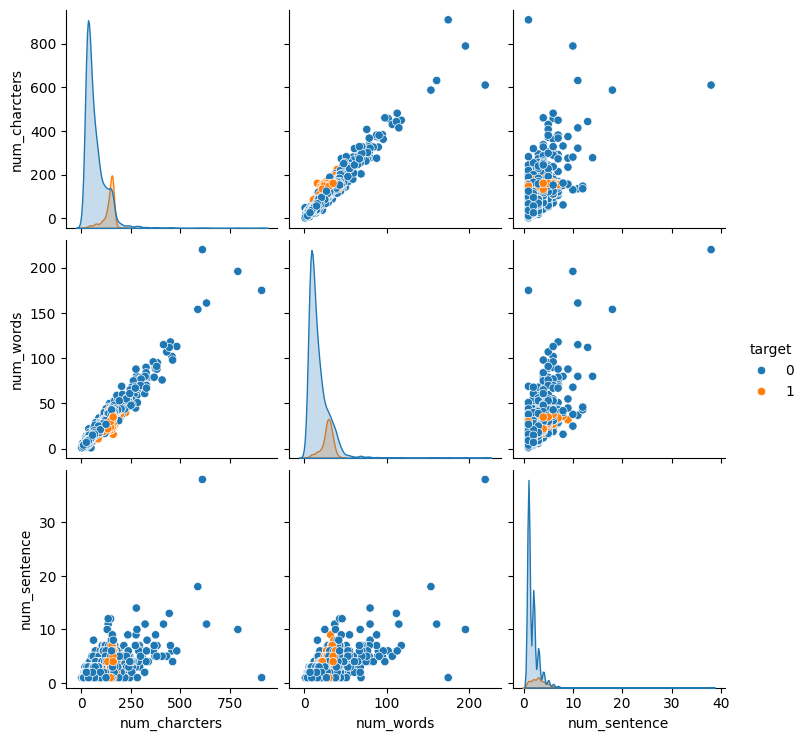

In [44]:
sns.pairplot(data=df,hue='target')
plt.show()

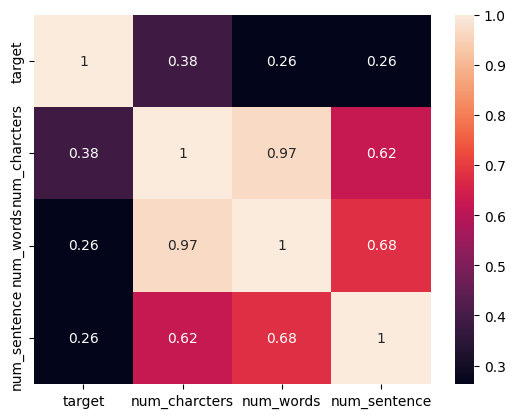

In [45]:
sns.heatmap(df.drop(columns=['text']).corr(),annot=True)
plt.show()

In [75]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Prince
[nltk_data]     Dwivedi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [47]:
import string
from nltk.stem import PorterStemmer

In [48]:
ps=PorterStemmer()

In [49]:
def transform_text (text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
      if i not in stopwords.words('english') and i not in string.punctuation:
        y.append(i)
    text= y[:]
    y.clear()
    for i in text:
      y.append(ps.stem(i))
    return " ".join(y)


In [50]:
transform_text("MY NAME IS PRINCE and i loved by mikasa bit#h and you can not denay that?")

'name princ love mikasa bit h denay'

In [51]:
df['transform_text'] = df['text'].apply(transform_text)

In [52]:
df.head(2)

,target,text,num_charcters,num_words,num_sentence,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni


In [54]:
from wordcloud import WordCloud
wc = WordCloud(height=500,width=500,background_color='white',min_font_size=10)

In [55]:
spam_wc = wc.generate(df[df['target']==1]['transform_text'].str.cat(sep=''))

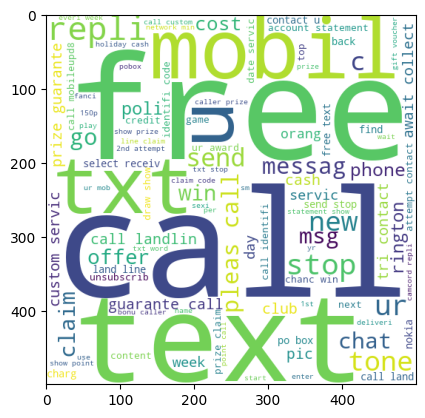

In [56]:
plt.imshow(spam_wc)

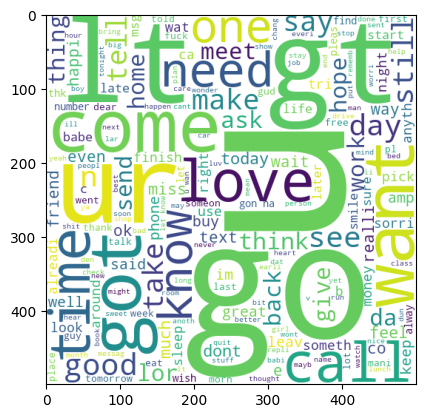

In [57]:
ham_wc = wc.generate(df[df['target']==0]['transform_text'].str.cat(sep=''))
plt.imshow(ham_wc)

In [58]:
e=[]
from collections import Counter
for msg in  df[df['target']==1]['transform_text'].tolist():
  for word in msg.split():
    e.append(word)

In [59]:
len(e)

9939

# model traning

In [60]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [61]:
cv = CountVectorizer()
x=cv.fit_transform(df['transform_text']).toarray()

In [62]:
x.shape

(5169, 6708)

In [63]:
y=df['target'].values

In [64]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [66]:
x_train,x_test , y_train,y_test  = train_test_split(x,y,test_size=0.2,random_state=42)

In [67]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB, BernoulliNB
from sklearn.tree import  DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [68]:
gsb= GaussianNB()
gsb.fit(x_train,y_train)

,priors,None
,var_smoothing,1e-09


In [69]:
y_pred = gsb.predict(x_test)
print(accuracy_score(y_pred,y_test)*100)

86.84719535783366


In [70]:
mnb= MultinomialNB()
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_pred2,y_test)*100)
print(confusion_matrix(y_pred2,y_test))
print(precision_score(y_pred2,y_test)*100)



97.38878143133462
[[872  10]
 [ 17 135]]
93.10344827586206


In [71]:
bnb= BernoulliNB()
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_pred3,y_test)*100)
print(confusion_matrix(y_pred3,y_test))
print(precision_score(y_pred3,y_test)*100)

96.61508704061895
[[885  31]
 [  4 114]]
78.62068965517241


In [72]:
models= {
    "Decision tree": DecisionTreeClassifier(),
    "Random forest": RandomForestClassifier(),
    "naive bais": MultinomialNB(),
    "SVM": SVC,
    'Neighbours':KNeighborsClassifier()}


In [73]:
result = {}

for name , model in models.items():
  if name == "SVM":
    model = model(kernel='linear') # Create an instance of the SVC class with a linear kernel
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  acc = accuracy_score(y_test,y_pred)*100
  pre = precision_score(y_test,y_pred)*100
  result[name]= (round(acc,2),round(pre,2)) # Store accuracy and precision as a tuple

results_list = []
for name, (acc, pre) in result.items():
    results_list.append([name, acc, pre])

results_df = pd.DataFrame(results_list, columns=["Model", "Accuracy","Precision"]).sort_values(by="Precision", ascending=False)
print(results_df)

           Model  Accuracy  Precision
4     Neighbours     90.43     100.00
1  Random forest     96.62      99.11
3            SVM     98.16      98.46
2     naive bais     97.39      88.82
0  Decision tree     95.74      86.86


In [74]:
import pickle
pickle.dump(cv,open("cv.pkl",'wb'))
pickle.dump(mnb,open('mnb.pkl','wb'))